In [1]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Dataset & Dataloader

In [2]:
from src.dataset import VCTKTripletDataset, VCTKTripletDataloader
from torch.utils.data import DataLoader

In [3]:
bs = 32

train_set = VCTKTripletDataset("vctk_dataset/wav48/", "vctk_dataset/txt/", n_data=3000, min_dur=1.5)
trainloader = VCTKTripletDataloader(train_set, batch_size=bs)

test_set = VCTKTripletDataset("vctk_dataset/wav48/", "vctk_dataset/txt/", n_data=3000, min_dur=1.5)
testloader = VCTKTripletDataloader(test_set, batch_size=bs)


Excluding 5 triplet containing audio shorter than 1.5s



Excluding 4 triplet containing audio shorter than 1.5s


# Architecture & Config

In [4]:
from src.model import Encoder

In [5]:
config = set_config({
    "ndim": 256,
    "margin": 1,
    "sr": train_set.sr,
    "n_mfcc": train_set.n_mfcc,
    "min_dur": train_set.min_dur
})

# Training Preparation

In [8]:
from jcopdl.optim import RangerLARS

In [7]:
model = Encoder(ndim=config.ndim, triplet=True).to(device)
criterion = nn.TripletMarginLoss(config.margin)
callback = Callback(model, config, outdir="model", early_stop_patience=15)
optimizer = RangerLARS(model.parameters(), lr=0.001)

# Training

In [ ]:
from tqdm.auto import tqdm



Epoch     1
Train_cost  = 1.0172 | Test_cost  = 0.5988 | 




Epoch     2
Train_cost  = 0.4765 | Test_cost  = 0.5663 | 




Epoch     3
Train_cost  = 0.4167 | Test_cost  = 0.4586 | 




Epoch     4
Train_cost  = 0.3756 | Test_cost  = 0.7722 | 
==> EarlyStop patience =  1 | Best test_cost: 0.4586




Epoch     5
Train_cost  = 0.3550 | Test_cost  = 0.4741 | 
==> EarlyStop patience =  2 | Best test_cost: 0.4586




Epoch     6
Train_cost  = 0.3182 | Test_cost  = 0.3568 | 




Epoch     7
Train_cost  = 0.2607 | Test_cost  = 0.6882 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3568




Epoch     8
Train_cost  = 0.2854 | Test_cost  = 0.5152 | 
==> EarlyStop patience =  2 | Best test_cost: 0.3568




Epoch     9
Train_cost  = 0.2831 | Test_cost  = 0.5932 | 
==> EarlyStop patience =  3 | Best test_cost: 0.3568




Epoch    10
Train_cost  = 0.2778 | Test_cost  = 0.3598 | 
==> EarlyStop patience =  4 | Best test_cost: 0.3568




Epoch    11
Train_cost  = 0.2463 | Test_cost  = 0.3847 | 
==> EarlyStop patience =  5 | Best test_cost: 0.3568




Epoch    12
Train_cost  = 0.1843 | Test_cost  = 0.3590 | 
==> EarlyStop patience =  6 | Best test_cost: 0.3568




Epoch    13
Train_cost  = 0.2000 | Test_cost  = 0.6190 | 
==> EarlyStop patience =  7 | Best test_cost: 0.3568




Epoch    14
Train_cost  = 0.2021 | Test_cost  = 0.4642 | 
==> EarlyStop patience =  8 | Best test_cost: 0.3568



Excluding 111 triplet containing audio shorter than 2s




Epoch    15
Train_cost  = 0.3559 | Test_cost  = 0.4489 | 
==> EarlyStop patience =  9 | Best test_cost: 0.3568




Epoch    16
Train_cost  = 0.2582 | Test_cost  = 0.6510 | 
==> EarlyStop patience = 10 | Best test_cost: 0.3568




Epoch    17
Train_cost  = 0.2010 | Test_cost  = 0.4580 | 
==> EarlyStop patience = 11 | Best test_cost: 0.3568




Epoch    18
Train_cost  = 0.1733 | Test_cost  = 0.3343 | 




Epoch    19
Train_cost  = 0.1781 | Test_cost  = 0.3485 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3343




Epoch    20
Train_cost  = 0.1678 | Test_cost  = 0.4347 | 


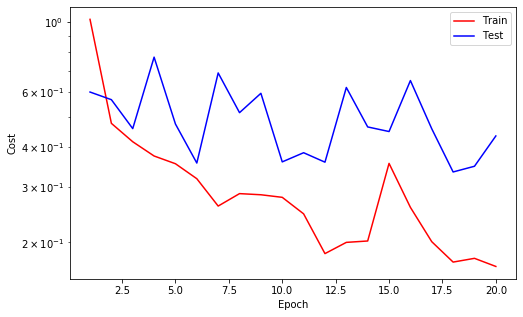

==> EarlyStop patience =  2 | Best test_cost: 0.3343




Epoch    21
Train_cost  = 0.1250 | Test_cost  = 0.4369 | 
==> EarlyStop patience =  3 | Best test_cost: 0.3343




Epoch    22
Train_cost  = 0.0971 | Test_cost  = 0.5319 | 
==> EarlyStop patience =  4 | Best test_cost: 0.3343




Epoch    23
Train_cost  = 0.1306 | Test_cost  = 0.6245 | 
==> EarlyStop patience =  5 | Best test_cost: 0.3343




Epoch    24
Train_cost  = 0.1188 | Test_cost  = 0.3027 | 




Epoch    25
Train_cost  = 0.0705 | Test_cost  = 0.3680 | 
==> EarlyStop patience =  1 | Best test_cost: 0.3027




Epoch    26
Train_cost  = 0.1018 | Test_cost  = 0.3747 | 
==> EarlyStop patience =  2 | Best test_cost: 0.3027




Epoch    27
Train_cost  = 0.0855 | Test_cost  = 0.3644 | 
==> EarlyStop patience =  3 | Best test_cost: 0.3027




Epoch    28
Train_cost  = 0.1093 | Test_cost  = 0.5579 | 
==> EarlyStop patience =  4 | Best test_cost: 0.3027




Epoch    29
Train_cost  = 0.1091 | Test_cost  = 0.4551 | 
==> EarlyStop patience =  5 | Best test_cost: 0.3027



Excluding 107 triplet containing audio shorter than 2s




Epoch    30
Train_cost  = 0.4200 | Test_cost  = 0.4285 | 
==> EarlyStop patience =  6 | Best test_cost: 0.3027




Epoch    31
Train_cost  = 0.3511 | Test_cost  = 0.3977 | 
==> EarlyStop patience =  7 | Best test_cost: 0.3027




Epoch    32
Train_cost  = 0.2801 | Test_cost  = 0.3728 | 
==> EarlyStop patience =  8 | Best test_cost: 0.3027




Epoch    33
Train_cost  = 0.2376 | Test_cost  = 0.3976 | 
==> EarlyStop patience =  9 | Best test_cost: 0.3027




Epoch    34
Train_cost  = 0.1812 | Test_cost  = 0.3722 | 
==> EarlyStop patience = 10 | Best test_cost: 0.3027




Epoch    35
Train_cost  = 0.1530 | Test_cost  = 0.3332 | 
==> EarlyStop patience = 11 | Best test_cost: 0.3027




Epoch    36
Train_cost  = 0.1316 | Test_cost  = 0.2973 | 




Epoch    37
Train_cost  = 0.1202 | Test_cost  = 0.3385 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2973




Epoch    38
Train_cost  = 0.1466 | Test_cost  = 0.2935 | 




Epoch    39
Train_cost  = 0.1281 | Test_cost  = 0.3025 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2935




Epoch    40
Train_cost  = 0.1336 | Test_cost  = 0.3527 | 


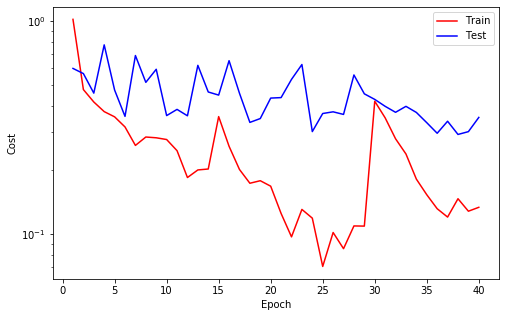

==> EarlyStop patience =  2 | Best test_cost: 0.2935




Epoch    41
Train_cost  = 0.0980 | Test_cost  = 0.3339 | 
==> EarlyStop patience =  3 | Best test_cost: 0.2935




Epoch    42
Train_cost  = 0.1035 | Test_cost  = 0.3478 | 
==> EarlyStop patience =  4 | Best test_cost: 0.2935




Epoch    43
Train_cost  = 0.1279 | Test_cost  = 0.3431 | 
==> EarlyStop patience =  5 | Best test_cost: 0.2935




Epoch    44
Train_cost  = 0.1154 | Test_cost  = 0.3435 | 
==> EarlyStop patience =  6 | Best test_cost: 0.2935



Excluding 109 triplet containing audio shorter than 2s




Epoch    45
Train_cost  = 0.3281 | Test_cost  = 0.3639 | 
==> EarlyStop patience =  7 | Best test_cost: 0.2935




Epoch    46
Train_cost  = 0.2382 | Test_cost  = 0.3599 | 
==> EarlyStop patience =  8 | Best test_cost: 0.2935




Epoch    47
Train_cost  = 0.1881 | Test_cost  = 0.4352 | 
==> EarlyStop patience =  9 | Best test_cost: 0.2935




Epoch    48
Train_cost  = 0.1857 | Test_cost  = 0.3114 | 
==> EarlyStop patience = 10 | Best test_cost: 0.2935




Epoch    49
Train_cost  = 0.1530 | Test_cost  = 0.2538 | 




Epoch    50
Train_cost  = 0.1308 | Test_cost  = 0.2428 | 




Epoch    51
Train_cost  = 0.1367 | Test_cost  = 0.2485 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2428




Epoch    52
Train_cost  = 0.1095 | Test_cost  = 0.3548 | 
==> EarlyStop patience =  2 | Best test_cost: 0.2428




Epoch    53
Train_cost  = 0.1253 | Test_cost  = 0.3547 | 
==> EarlyStop patience =  3 | Best test_cost: 0.2428




Epoch    54
Train_cost  = 0.0841 | Test_cost  = 0.2781 | 
==> EarlyStop patience =  4 | Best test_cost: 0.2428




Epoch    55
Train_cost  = 0.0959 | Test_cost  = 0.2799 | 
==> EarlyStop patience =  5 | Best test_cost: 0.2428




Epoch    56
Train_cost  = 0.1294 | Test_cost  = 0.2982 | 
==> EarlyStop patience =  6 | Best test_cost: 0.2428




Epoch    57
Train_cost  = 0.1065 | Test_cost  = 0.3317 | 
==> EarlyStop patience =  7 | Best test_cost: 0.2428




Epoch    58
Train_cost  = 0.0826 | Test_cost  = 0.3763 | 
==> EarlyStop patience =  8 | Best test_cost: 0.2428




Epoch    59
Train_cost  = 0.0953 | Test_cost  = 0.2631 | 
==> EarlyStop patience =  9 | Best test_cost: 0.2428



Excluding 105 triplet containing audio shorter than 2s




Epoch    60
Train_cost  = 0.2748 | Test_cost  = 0.3295 | 


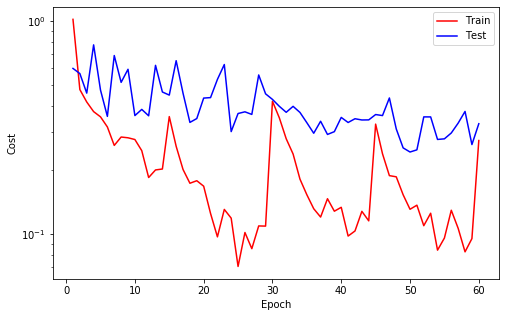

==> EarlyStop patience = 10 | Best test_cost: 0.2428




Epoch    61
Train_cost  = 0.2158 | Test_cost  = 0.2724 | 
==> EarlyStop patience = 11 | Best test_cost: 0.2428




Epoch    62
Train_cost  = 0.1330 | Test_cost  = 0.2572 | 
==> EarlyStop patience = 12 | Best test_cost: 0.2428




Epoch    63
Train_cost  = 0.1276 | Test_cost  = 0.3200 | 
==> EarlyStop patience = 13 | Best test_cost: 0.2428




Epoch    64
Train_cost  = 0.1022 | Test_cost  = 0.2835 | 
==> EarlyStop patience = 14 | Best test_cost: 0.2428




Epoch    65
Train_cost  = 0.0726 | Test_cost  = 0.2822 | 
==> EarlyStop patience = 15 | Best test_cost: 0.2428
==> Execute Early Stopping at epoch: 65 | Best test_cost: 0.2428
==> Best model is saved at model_256


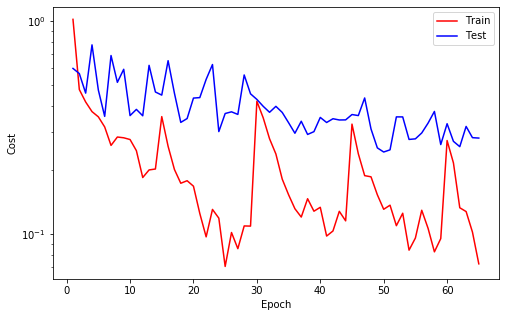

In [11]:
while True:
    if callback.ckpt.epoch % 15 == 0:
        train_set = VCTKTripletDataset("vctk_dataset/wav48/", "vctk_dataset/txt/", n_data=3000)
        trainloader = VCTKTripletDataloader(train_set, batch_size=bs)
    
    model.train()
    cost = 0
    for images, labels in tqdm(trainloader, desc="Train"):
        images = images.to(device)
        
        output = model(images)
        loss = criterion(output[0], output[1], output[2])
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        
        cost += loss.item()*images.shape[0]
    train_cost = cost/len(train_set)
    
    with torch.no_grad():
        model.eval()
        cost = 0
        for images, labels in tqdm(testloader, desc="Test"):
            images = images.to(device)
        
            output = model(images)
            loss = criterion(output[0], output[1], output[2])
            
            cost += loss.item()*images.shape[0]
        test_cost = cost/len(test_set)

    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break